In [12]:
from fastai.tabular import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
dataset = pd.read_csv("/data/home/anshch/Downloads/Recommendation/Rec/ml-100k/u.data",sep='\t',names="user_id,item_id,rating,timestamp".split(","))
dataset.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [34]:
len(dataset.user_id.unique()), len(dataset.item_id.unique())

(943, 1682)

In [35]:
valid_idx = range(len(dataset)-20000, len(dataset))
valid_idx

range(80000, 100000)

In [36]:
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values

In [37]:
names_categorical_features = ["user_id","item_id"]

names_target = ['rating']
names_selected_features = names_categorical_features + names_target
names_selected_features

['user_id', 'item_id', 'rating']

In [38]:
data_df_selected = dataset.filter(names_selected_features)

In [41]:
procs = [FillMissing, Categorify, Normalize]
data = (TabularList.from_df(data_df_selected, path='/data/home/anshch/Downloads/Recommendation/Rec/', cat_names=names_categorical_features, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols='rating', label_cls=FloatList, log=False)
                           .databunch())
data.show_batch(rows=10)

user_id,item_id,target
289,483,3.0
803,143,4.0
23,426,5.0
607,64,5.0
726,117,4.0
869,641,4.0
275,442,4.0
709,339,4.0
285,1374,5.0
681,50,5.0


In [42]:
y_range = torch.tensor([1, 5], device=defaults.device)
model_fastai = tabular_learner(data, layers = [32, 32, 32], emb_drop=0.04, ps=[0.1, 0.2, 0.1], metrics=mae, y_range=y_range)
model_fastai.loss_fn = F.l1_loss
model_fastai.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(944, 74)
    (1): Embedding(1651, 101)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=175, out_features=32, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2)
    (8): Linear(in_features=32, out_features=32, bias=True)
    (9): ReLU(inplace)
    (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.1)
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [43]:
#find lr
model_fastai.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


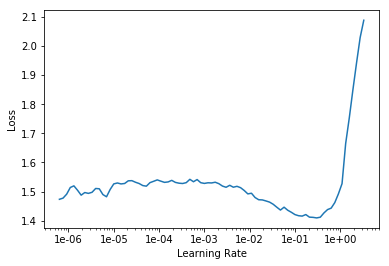

In [44]:
model_fastai.recorder.plot()

In [45]:
#%%
model_fastai.fit_one_cycle(5,1e-03)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,1.004075,0.957967,0.774085,00:25
1,0.893052,0.900317,0.753198,00:24
2,0.875814,0.870972,0.740698,00:26
3,0.825356,0.859130,0.732699,00:26
4,0.816875,0.861510,0.733593,00:25


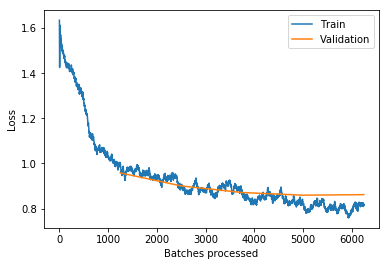

In [46]:
#%%
model_fastai.recorder.plot_losses()